In [1]:
import numpy as np

from rls.formula.physics import lorentz_factor
from rls.data_types import Particle

rng = np.random.default_rng()


def generate_initial_conditions(species, model, number_of_particles=10):
    c = model.units.light_speed.code
    wc = species.wc(model.B0).code

    kw = dict(low=-1.0, high=1.0, size=number_of_particles)
    x0 = (c / wc) * rng.uniform(**kw)
    y0 = (c / wc) * rng.uniform(**kw)
    z0 = (c / wc) * rng.uniform(**kw)
    ux0 = 0.01 * c * rng.uniform(**kw)
    uy0 = 0.01 * c * rng.uniform(**kw)
    uz0 = 0.01 * c * rng.uniform(**kw)
    g0 = lorentz_factor(ux0, uy0, uz0, c)

    return Particle(species, 0.0, g0, x0, y0, z0, ux0, uy0, uz0)

In [2]:
from tvolib import mpl_utils as mu


def diagnostic_plot(
    analytical_solutions,
    numerical_solutions,
    model,
):
    # Unpack
    t = numerical_solutions.t
    _, xa, ya, za, uxa, uya, uza = analytical_solutions.as_tuple()
    _, xn, yn, zn, uxn, uyn, uzn = numerical_solutions.as_tuple()

    c = model.units.light_speed.code
    wc = species.wc(model.B0).code
    Tc = species.Tc(model.B0).code

    fig, axes = mu.plt.subplots(3, 2, figsize=(12, 8), sharex=True)
    fig.suptitle(f"{species.name.capitalize()} solutions")
 
    for ip in range(xa.shape[1]):
        axes[0, 0].plot(t / Tc, wc / c * (xa[:, ip] - xa[0, ip]), "-k")
        axes[1, 0].plot(t / Tc, wc / c * (ya[:, ip] - ya[0, ip]), "-k")
        axes[2, 0].plot(t / Tc, wc / c * (za[:, ip] - za[0, ip]), "-k")
        axes[0, 1].plot(t / Tc, uxa[:, ip] / c, "-k")
        axes[1, 1].plot(t / Tc, uya[:, ip] / c, "-k")
        axes[2, 1].plot(t / Tc, uza[:, ip] / c, "-k")
        
        axes[0, 0].plot(t / Tc , wc / c * (xn[:, ip] - xn[0, ip]), "--r")
        axes[1, 0].plot(t / Tc , wc / c * (yn[:, ip] - yn[0, ip]), "--r")
        axes[2, 0].plot(t / Tc , wc / c * (zn[:, ip] - zn[0, ip]), "--r")
        axes[0, 1].plot(t / Tc , uxn[:, ip] / c, "--r")
        axes[1, 1].plot(t / Tc , uyn[:, ip] / c, "--r")
        axes[2, 1].plot(t / Tc , uzn[:, ip] / c, "--r")
 
    axes[0, 0].set_ylabel("$c(x-x_0)/\Omega_c$")
    axes[1, 0].set_ylabel("$c(y-y_0)/\Omega_c$")
    axes[2, 0].set_ylabel("$c(z-z_0)/\Omega_c$")
    axes[2, 0].set_xlabel("$t/T_c$")
    axes[0, 1].set_ylabel("$u_x/c$")
    axes[1, 1].set_ylabel("$u_y/c$")
    axes[2, 1].set_ylabel("$u_z/c$")
    axes[2, 1].set_xlabel("$t/T_c$")
    for i, j in np.ndindex(axes.shape):
        ax = axes[i, j]
        ax.set_xlim(t[-1] / Tc - 3, t[-1] / Tc)
        
    fig.tight_layout(h_pad=0.05)
 
    fig, axes = mu.plt.subplots(2, 1, figsize=(12, 4), sharex=True)
    fig.suptitle(f"{species.name.capitalize()} error")
    
    r_norm = np.max(np.sqrt(xa**2 + ya**2 + za**2), axis=0)[np.newaxis, :]
    u_norm = np.max(np.sqrt(uxa**2 + uya**2 + uza**2), axis=0)[np.newaxis, :]
    eps_r = np.sqrt((xa - xn)**2 + (ya - yn)**2 + (za - zn)**2) / r_norm
    eps_u = np.sqrt((uxa - uxn)**2 + (uya - uyn)**2 + (uza - uzn)**2) / u_norm

    for ip in range(xa.shape[1]):
        axes[0].plot(t / Tc, eps_r[:, ip])
        axes[1].plot(t / Tc, eps_u[:, ip])

    axes[0].set_ylabel("$\epsilon_r$")
    axes[1].set_ylabel("$\epsilon_u$")
    axes[1].set_xlabel("$t/T_c$")
    for (i, ax) in enumerate(axes):
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlim(1e-2, (t / Tc)[-1])
        ax.set_ylim(1e-7, 1e-1)
        ax.grid()

    fig.tight_layout(h_pad=0.05)
 
    mu.plt.show()

## Uniform magnetic field

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000013 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000012 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000013 ms/step, estimated remaining run time = 0.00 min)
Done!


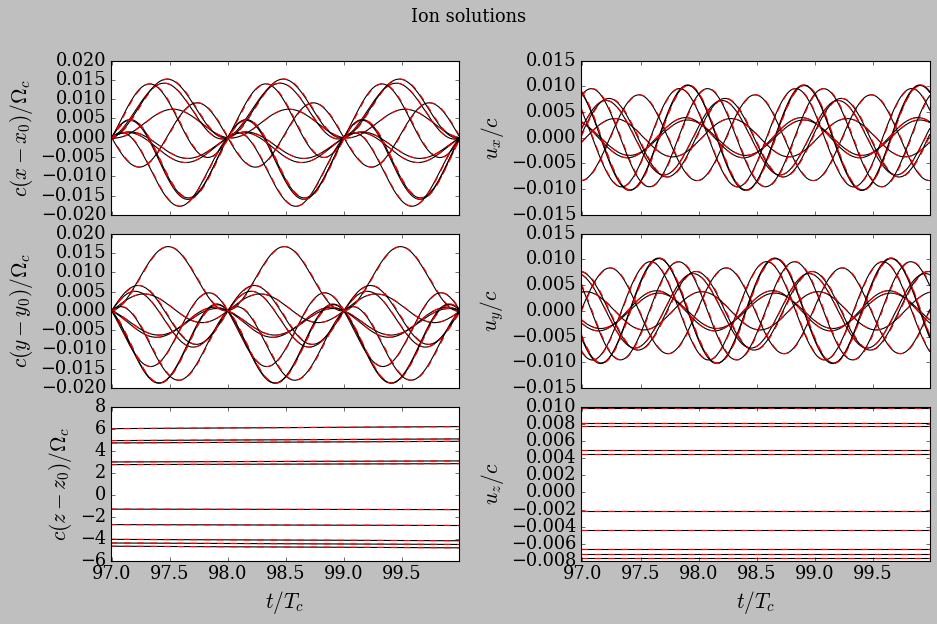

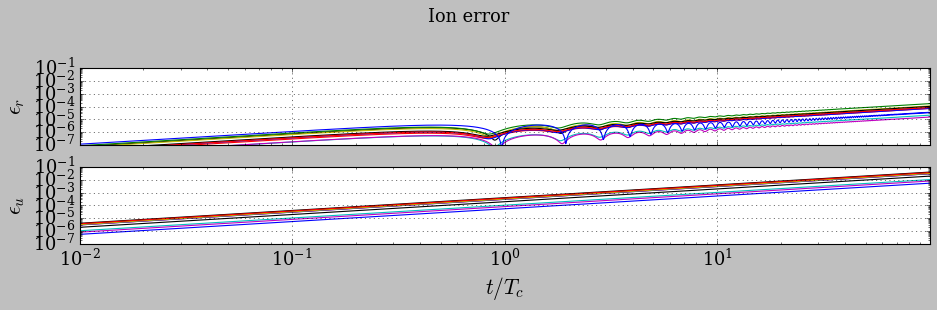

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Done!


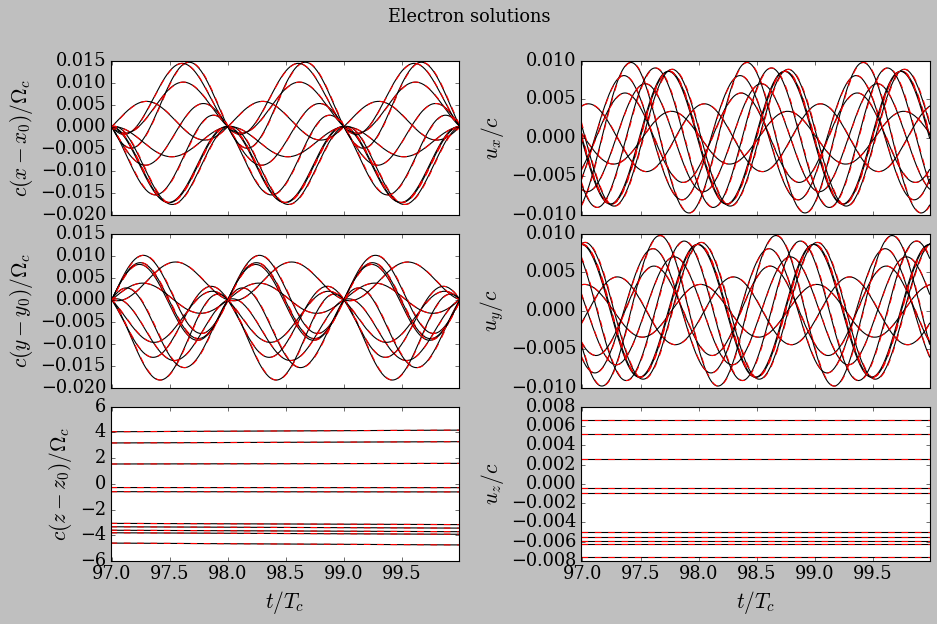

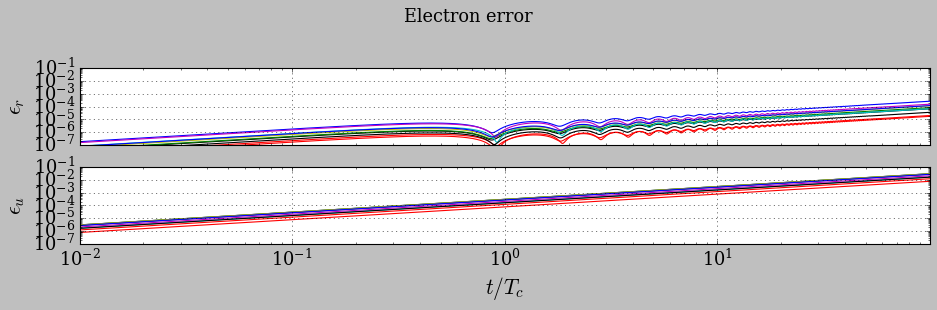

In [3]:
from rls.simulation import Simulation
from rls.models import UniformPlasmaModel

sim = Simulation(model=UniformPlasmaModel())

for scaling in ["ion", "electron"]:
    sim.model.units.set_scale(scaling)
    species = sim.model.units.scaling_species
    ICs = generate_initial_conditions(species, sim.model)
    Tc = species.Tc(sim.model.B0).code
    sim.run(
        initial_conditions=ICs,
        run_time=100.0 * Tc,
        step_size=1e-2 * Tc,
        save_intervals=10000,
        log_intervals=5,
    )
    t = sim.solutions.t
    analytical_solutions = sim.model.analytical_solution(t, ICs)
 
    diagnostic_plot(
        analytical_solutions,
        sim.solutions,
        sim.model,
    )

## ExB drift

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000017 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Done!


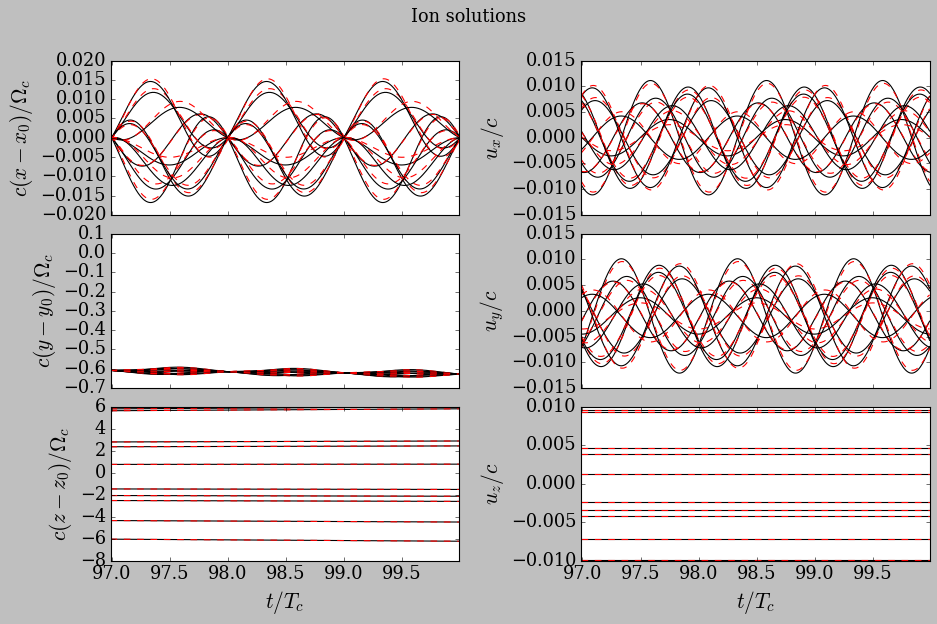

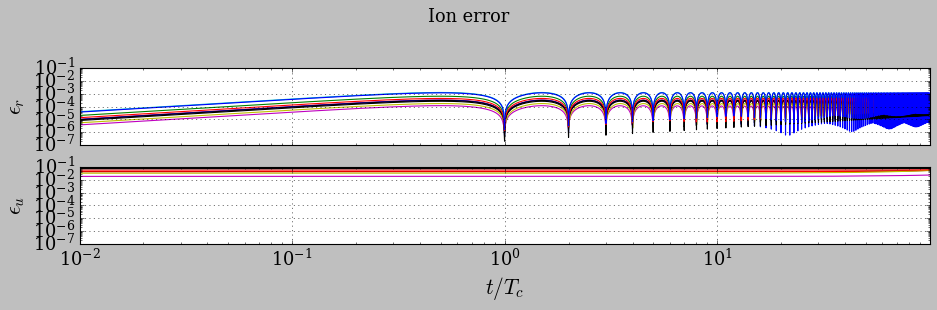

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000014 ms/step, estimated remaining run time = 0.00 min)
Done!


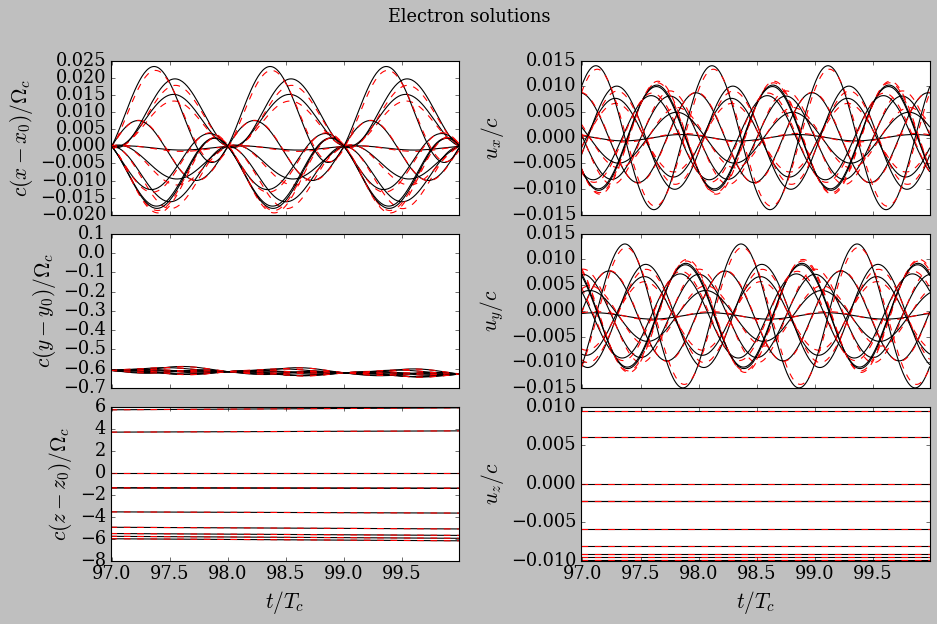

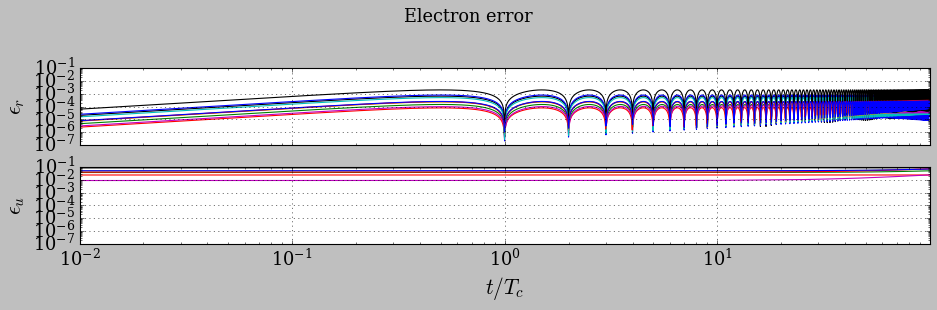

In [4]:
from rls.simulation import Simulation
from rls.models import UniformPlasmaModel

sim = Simulation(model=UniformPlasmaModel(E0=1e-3))

for scaling in ["ion", "electron"]:
    sim.model.units.set_scale(scaling)
    species = sim.model.units.scaling_species
    ICs = generate_initial_conditions(species, sim.model)
    Tc = species.Tc(sim.model.B0).code
    sim.run(
        initial_conditions=ICs,
        run_time=100.0 * Tc,
        step_size=1e-2 * Tc,
        save_intervals=10000,
        log_intervals=5,
    )
    t = sim.solutions.t
    analytical_solutions = sim.model.analytical_solution(t, ICs)

    diagnostic_plot(
        analytical_solutions,
        sim.solutions,
        sim.model,
    )

## Hyperbolic gradient edge case

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000016 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000016 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000016 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000016 ms/step, estimated remaining run time = 0.00 min)
Done!


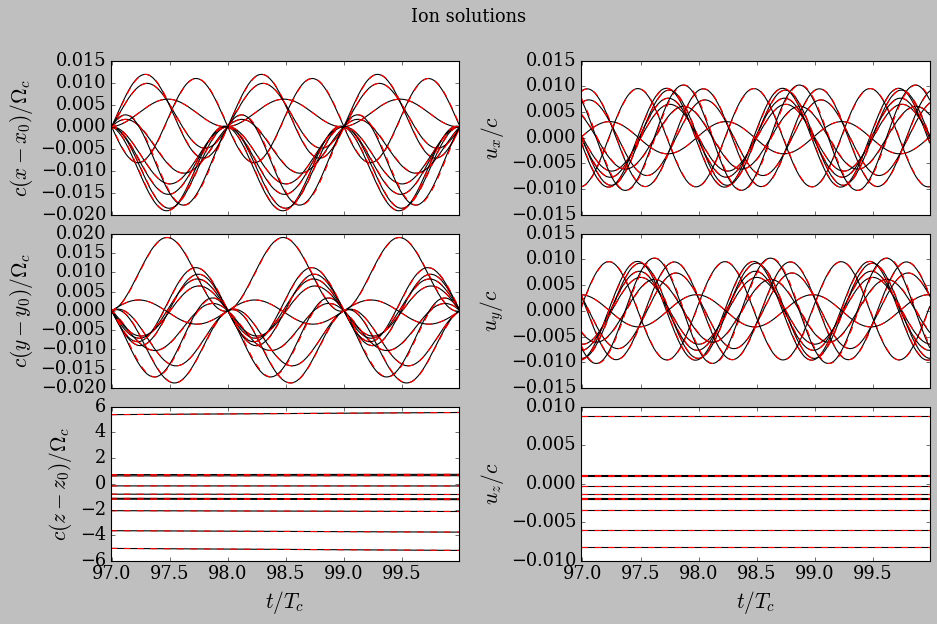

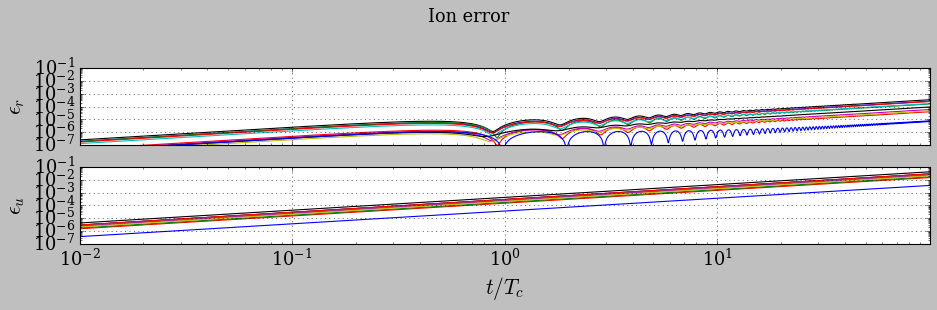

Pushed 0/10000 steps (0.00%, 0.000000 ms/step, estimated remaining run time = 0.00 min)
Pushed 2000/10000 steps (20.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 4000/10000 steps (40.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 6000/10000 steps (60.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Pushed 8000/10000 steps (80.00%, 0.000015 ms/step, estimated remaining run time = 0.00 min)
Done!


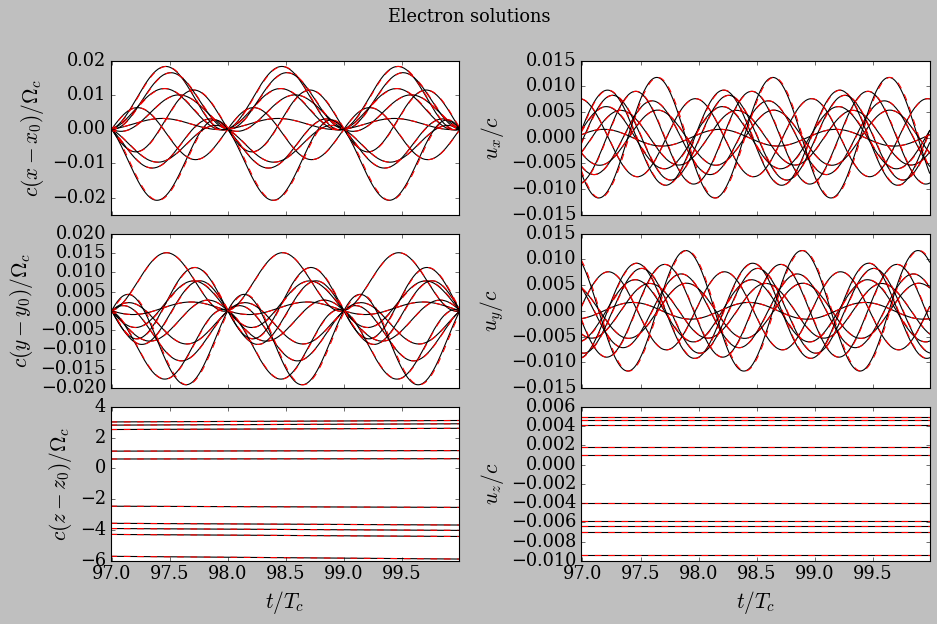

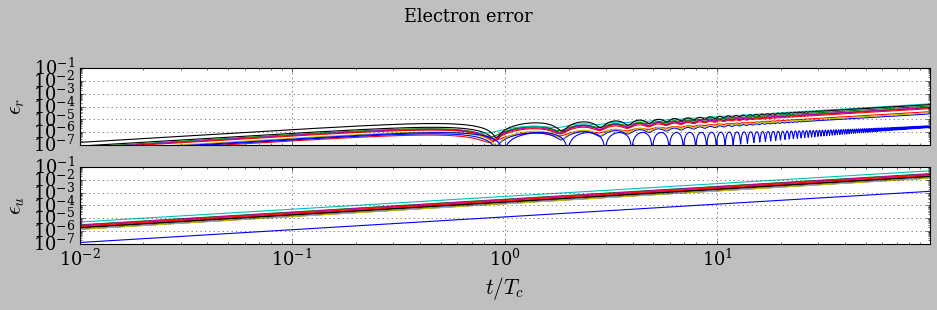

In [5]:
from rls.models import HyperbolicGradientModel

sim.model = HyperbolicGradientModel(Bh=0.0)
for scaling in ["ion", "electron"]:
    sim.model.units.set_scale(scaling)
    species = sim.model.units.scaling_species
    ICs = generate_initial_conditions(species, sim.model)
    Tc = species.Tc(sim.model.B0).code
    sim.run(
        initial_conditions=ICs,
        run_time=100.0 * Tc,
        step_size=1e-2 * Tc,
        save_intervals=10000,
        log_intervals=5,
    )
    t = sim.solutions.t
    analytical_solutions = sim.model.analytical_solution(t, ICs)

    diagnostic_plot(
        analytical_solutions,
        sim.solutions,
        sim.model,
    )